In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
data = pd.read_csv("//content//Iris.csv")


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['Species'] = data['Species'].astype('category')
data['Species'] = data['Species'].cat.codes
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [5]:
features = ["SepalLengthCm" , "SepalWidthCm" , "PetalLengthCm" , "PetalWidthCm", "Species" ]

In [6]:
data = data[features].copy()
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [8]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.00,6.625,1.610169,1.375,1.0
1,2.50,4.750,1.610169,1.375,1.0
2,2.00,5.500,1.457627,1.375,1.0
3,1.75,5.125,1.762712,1.375,1.0
4,2.75,7.000,1.610169,1.375,1.0
...,...,...,...,...,...
145,7.00,4.750,7.406780,9.250,10.0
146,6.00,2.875,7.101695,7.750,10.0
147,6.50,4.750,7.406780,8.125,10.0
148,5.75,6.250,7.711864,9.250,10.0


In [9]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis =1)

In [10]:
centroids = random_centroids(data, 5)

In [11]:
centroids

,0,1,2,3,4
SepalLengthCm,5.500000,4.750000,6.500000,2.750000,1.250000
SepalWidthCm,6.625000,5.500000,2.875000,4.000000,6.250000
PetalLengthCm,1.457627,1.610169,1.762712,1.762712,1.762712
PetalWidthCm,1.375000,6.250000,8.500000,5.875000,4.375000
Species,5.500000,5.500000,1.000000,5.500000,10.000000


In [12]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [13]:
labels = get_labels(data, centroids)

In [14]:
labels.value_counts()

1    73
0    48
3    28
4     1
dtype: int64

In [15]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [17]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

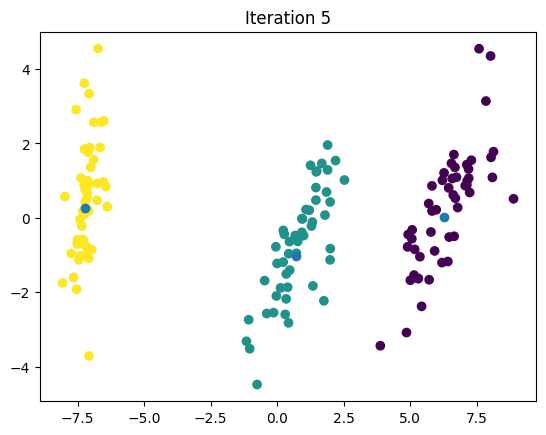

In [28]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    iteration += 1

plot_clusters(data, labels, centroids, 5)